In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Dados*

In [2]:
df = pd.read_csv('questionario_ihc.csv')
df = df.dropna(how='all')
df.head()

,Carimbo de data/hora,"Sabendo dessas informações, você consente que usemos seus dados aqui para uso exclusivo da nossa pesquisa acadêmica?",Marque a sua faixa etária:,Qual é o Campus do seu Curso?,Qual seu Curso de Graduação?,Qual período você esta cursando atualmente?,Você trabalha ou estagia?,"Se você trabalha ou estagia, qual a sua modalidade de trabalho?",Você participa de algum projeto de extensão?,"Caso não participe, aponte até 2 principais motivos",Selecione até 3 tipos de projetos ou atividades extracurriculares você mais se interessa,Classifique quanto a eficiência os meios para encontrar informações sobre oportunidades de projetos e de atividades extracurriculares [Sites da Proex],"Caso use outro meio, escreva-o abaixo",Você sente facilidade em se comunicar com professores e alunos de cursos de áreas diferentes?,"Se existisse uma plataforma que divulgasse somente os projetos de extensão dentre diferentes cursos, você acredita que aumentaria a visibilidade dos projetos?",Qual o principal meio que você busca por informações sobre oportunidades de projetos e atividades extracurriculares? [Linha 2],Classifique quanto a eficiência os meios para encontrar informações sobre oportunidades de projetos e de atividades extracurriculares [Contato diretamente com professor],Classifique quanto a eficiência os meios para encontrar informações sobre oportunidades de projetos e de atividades extracurriculares [E-mails da coordenação],Classifique quanto a eficiência os meios para encontrar informações sobre oportunidades de projetos e de atividades extracurriculares [Mural no prédio da faculdade],Qual o principal meio que você busca por informações sobre oportunidades de projetos e atividades extracurriculares? [Linha 5]
6,30/09/2023 15:07:01,Sim.,18 - 24 anos,Campus Niterói,Geografia - Licenciatura - Presencial,6º período,"Sim, aproximadamente 20h semanais.",Presencial.,"Sim, participo de um projeto voluntário (não p...",NaN,"Projetos de pesquisa, Atividades culturais",Indiferente,Divulgação dos Diretórios Acadêmicos,"Não, sinto dificuldade de me comunicar com ambos","Sim, bastante",NaN,Muito eficiente,Eficiente,Pouco eficiente,NaN
7,30/09/2023 15:16:03,Sim.,18 - 24 anos,Campus Niterói,Sistemas de Informação - Bacharelado - Presencial,1º período,"Sim, aproximadamente 40h semanais.",Remoto.,"Não participo, mas tenho interesse de particip...","Não consigo achar nenhum projeto, Piorizo outr...",Projetos de empreendedorismo,Eficiente,NaN,"Sim, sinto facilidade de me comunicar com ambos","Sim, bastante",NaN,Eficiente,Muito eficiente,Indiferente,NaN
8,30/09/2023 15:25:01,Sim.,18 - 24 anos,Campus Niterói,Sistemas de Informação - Bacharelado - Presencial,2º período,"Sim, aproximadamente 40h semanais.",Remoto.,"Não participo, mas tenho interesse de particip...","Falta de tempo, Não consigo achar nenhum projeto",Projetos de pesquisa,Não se aplica,NaN,"Não, sinto dificuldade de me comunicar com ambos","Sim, bastante",NaN,Eficiente,Pouco eficiente,Indiferente,NaN
9,30/09/2023 15:25:29,Sim.,18 - 24 anos,Campus Niterói,Sistemas de Informação - Bacharelado - Presencial,4º período,"Sim, aproximadamente 40h semanais.",Remoto.,"Não participo, mas tenho interesse de particip...",Não consigo achar nenhum projeto,"Projetos de pesquisa, Projetos de empreendedor...",Eficiente,NaN,"Sim, sinto facilidade de me comunicar com ambos","Sim, bastante",NaN,Eficiente,Muito eficiente,Eficiente,NaN
10,30/09/2023 15:27:02,Sim.,18 - 24 anos,Campus Niterói,Sistemas de Informação - Bacharelado - Presencial,9º período,"Sim, aproximadamente 40h semanais.",Remoto.,Não participo e não tenho interesse no momento.,"Falta de tempo, Não consigo achar nenhum projeto",Projetos de pesquisa,Indiferente,NaN,Não tenho costume de interagir com pessoas de ...,"Sim, bastante",NaN,Muito eficiente,Muito eficiente,Indiferente,NaN


## Colunas

In [3]:
df.columns

Index(['Carimbo de data/hora',
       'Sabendo dessas informações, você consente que usemos seus dados aqui para uso exclusivo da nossa pesquisa acadêmica?',
       'Marque a sua faixa etária:', 'Qual é o Campus do seu Curso?',
       'Qual seu Curso de Graduação?',
       'Qual período você esta cursando atualmente?',
       'Você trabalha ou estagia?',
       'Se você trabalha ou estagia, qual a sua modalidade de trabalho?',
       'Você participa de algum projeto de extensão?',
       'Caso não participe, aponte até 2 principais motivos',
       'Selecione até 3 tipos de projetos ou atividades extracurriculares você mais se interessa',
       'Classifique quanto a eficiência os meios para encontrar informações sobre oportunidades de projetos e de atividades extracurriculares [Sites da Proex]',
       'Caso use outro meio, escreva-o abaixo',
       'Você sente facilidade em se comunicar com professores e alunos de cursos de áreas diferentes?',
       'Se existisse uma plataforma que 

In [4]:
novas_colunas = [
    'data_hora', 
    'consentimento', 
    'idade', 
    'campus', 
    'curso', 
    'periodo',
    'trabalha', 
    'modalidade_trabalho', 
    'participa_projeto',
    'motivo_nao_participa_projeto', 
    'projetos_de_interese',
    'eficiencia_proex', 
    'outro_meio_busca_projetos',
    'facilidade_conversar_profs_alunos', 
    'plataforma_ajudaria',
    'meio_busca_projetos', 
    'eficiencia_professor', 
    'eficiencia_email',
    'eficiencia_mural', 
    'meio_busca_projetos_5'
]

In [13]:
print(df['meio_busca_projetos'].value_counts())
print(df['meio_busca_projetos_5'].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [14]:
colunas_remover = ['meio_busca_projetos', 'meio_busca_projetos_5', 'consentimento']

df = df.drop(colunas_remover, axis=1)

## Respostas

In [43]:
colunas_para_excluir = ['data_hora']

for c in df.columns:
    if c not in colunas_para_excluir:
        print(c)
        print(df[c].unique())
        print()

idade
['18 - 24 anos' '25 - 34 anos' '35 - 44 anos' '45 - 54 anos']

campus
['Campus Niterói' 'Campus Rio das Ostras']

curso
['Geografia - Licenciatura - Presencial'
 'Sistemas de Informação - Bacharelado - Presencial'
 'Geografia - Bacharelado - Presencial'
 'Ciências Econômicas - Bacharelado - Presencial'
 'Ciência da Computação - Bacharelado - Presencial'
 'Enfermagem - Bacharelado - Presencial'
 'Tecnologia em Sistemas de Computação - Tecnológico - EAD (Educação a Distância)'
 'Medicina - Bacharelado - Presencial'
 'Engenharia de Recursos Hídricos e do Meio Ambiente - Bacharelado - Presencial'
 'Engenharia Mecânica - Bacharelado - Presencial'
 'Direito - Bacharelado - Presencial'
 'Engenharia Elétrica - Bacharelado - Presencial'
 'Processos Gerenciais - Tecnológico - Presencial'
 'História - Licenciatura - Presencial'
 'Estatística - Bacharelado - Presencial'
 'Produção Cultural - Bacharelado - Presencial'
 'Psicologia - Bacharelado - Presencial'
 'Matemática - Licenciatura - Pres

In [35]:
df['motivo_nao_participa_projeto'].unique()

array([nan,
       'Não consigo achar nenhum projeto, Piorizo outras atividades no momento',
       'Falta de tempo, Não consigo achar nenhum projeto',
       'Não consigo achar nenhum projeto',
       'Falta de tempo, Piorizo outras atividades no momento',
       'Apenas não quero',
       'Não tem projetos de meu interesse, Não consigo achar nenhum projeto',
       'Não tem projetos de meu interesse, Já participei anteriormente',
       'Piorizo outras atividades no momento, Apenas não quero',
       'Não tem projetos de meu interesse, Piorizo outras atividades no momento',
       'Piorizo outras atividades no momento', 'Falta de tempo',
       'Não tem projetos de meu interesse',
       'Não tem projetos de meu interesse, Poucos projetos com bolsa',
       'Falta de tempo, Não tem projetos de meu interesse',
       'Falta de tempo, Para concorrer a bolsas de alguns projetos, precisar estar em periodos mais avançados',
       'Horário das aulas da faculdade não colabora, além dos pro

In [45]:
novas_respostas_participa_projeto = {'Sim, participo de um projeto voluntário (não possui bolsa).' : 'Sim, com bolsa',
 'Não participo, mas tenho interesse de participar de qualquer projeto (voluntário ou com bolsa).' : 'Não, quero qualquer um',
 'Não participo e não tenho interesse no momento.': 'Não, e não quero',
 'Sim, participo de um projeto de extensão com bolsa.': 'Sim, com bolsa',
 'Não participo, mas tenho interesse somente em projetos com bolsa.' : 'Não, quero com bolsa',
 'Não participo, mas tenho interesse somente em projetos voluntários.': 'Não, quero voluntario'}

df['participa_projeto'] = df['participa_projeto'].replace(novas_respostas_participa_projeto)
df['participa_projeto'].unique()

array(['Sim, com bolsa', 'Não, quero qualquer um', 'Não, e não quero',
       'Não, quero com bolsa'], dtype=object)

In [34]:
novas_respostas_trabalha = {'Sim, aproximadamente 20h semanais.': 'Sim, 20h',
                            'Sim, aproximadamente 40h semanais.': 'Sim, 40h',
                            'Sim, aproximadamente 30h semanais.': 'Sim, 30h'}

df['trabalha'] = df['trabalha'].replace(novas_respostas_trabalha)
df['trabalha'].unique()

array(['Sim, 20h', 'Sim, 40h', 'Sim, 30h', 'Não.'], dtype=object)

In [39]:
novas_respostas_facilidade_conversar_profs_alunos = {'Não, sinto dificuldade de me comunicar com ambos': 'dificuldade com ambos',
                                            'Sim, sinto facilidade de me comunicar com ambos': 'facilidade com ambos',
                                            'Não tenho costume de interagir com pessoas de outras áreas': 'nenhum dos dois',
                                            'Sim, mas somente com os alunos': 'somente alunos',
                                            'Sim, mas somente com os professores': 'somente professores'}

df['facilidade_conversar_profs_alunos'] = df['facilidade_conversar_profs_alunos'].replace(novas_respostas_facilidade_conversar_profs_alunos)
df['facilidade_conversar_profs_alunos'].unique()

array(['dificuldade com ambos', 'facilidade com ambos', 'nenhum dos dois',
       'somente alunos', 'somente professores'], dtype=object)

# *Perguntas*

## Quantos dos alunos estão em projeto de extensão, trabalham X horas por dia?

## Quem são os alunos que não estão fazendo projeto de extensão?

In [46]:
respostas_situacao_projeto = df['participa_projeto'].unique().tolist()
respostas_situacao_projeto

['Sim, com bolsa',
 'Não, quero qualquer um',
 'Não, e não quero',
 'Não, quero com bolsa']

In [48]:
nao_fazem_projeto = df[(df['participa_projeto'] == respostas_situacao_projeto[1]) | (df['participa_projeto'] == respostas_situacao_projeto[2]) | (df['participa_projeto'] == respostas_situacao_projeto[3])]

In [21]:
print(nao_fazem_projeto.count())


data_hora                            59
idade                                59
campus                               59
curso                                59
periodo                              59
trabalha                             59
modalidade_trabalho                  31
participa_projeto                    59
motivo_nao_participa_projeto         59
projetos_de_interese                 59
eficiencia_proex                     59
outro_meio_busca_projetos             2
facilidade_conversar_profs_alunos    59
plataforma_ajudaria                  59
eficiencia_professor                 59
eficiencia_email                     59
eficiencia_mural                     59
dtype: int64


In [23]:
nao_fazem_projeto['idade'].value_counts()

idade
18 - 24 anos    48
25 - 34 anos     9
35 - 44 anos     1
45 - 54 anos     1
Name: count, dtype: int64

In [24]:
nao_fazem_projeto['trabalha'].value_counts()

trabalha
Não.                                  28
Sim, aproximadamente 40h semanais.    13
Sim, aproximadamente 30h semanais.    12
Sim, aproximadamente 20h semanais.     6
Name: count, dtype: int64

## Quem são os alunos que estão fazendo projeto de extensão?

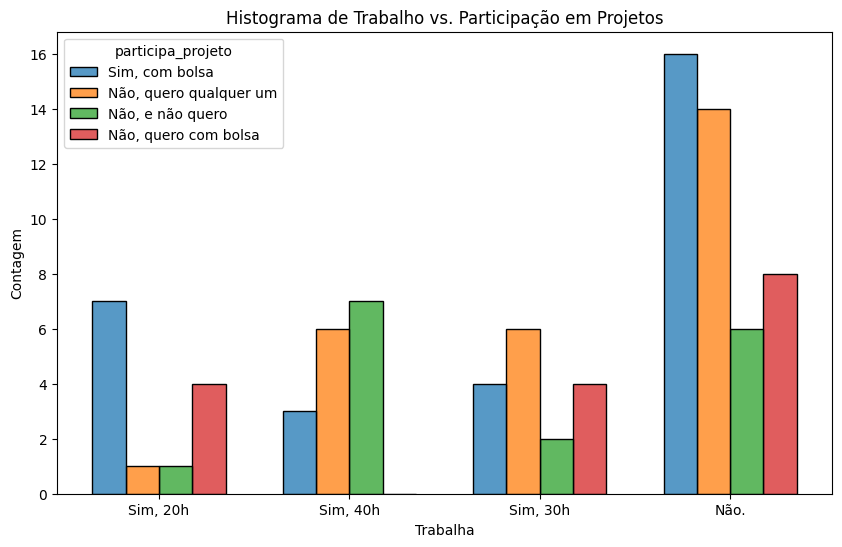

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='trabalha', hue='participa_projeto',multiple="dodge", shrink=0.7)
plt.xlabel('Trabalha')
plt.ylabel('Contagem')
plt.title('Histograma de Trabalho vs. Participação em Projetos')
plt.show()

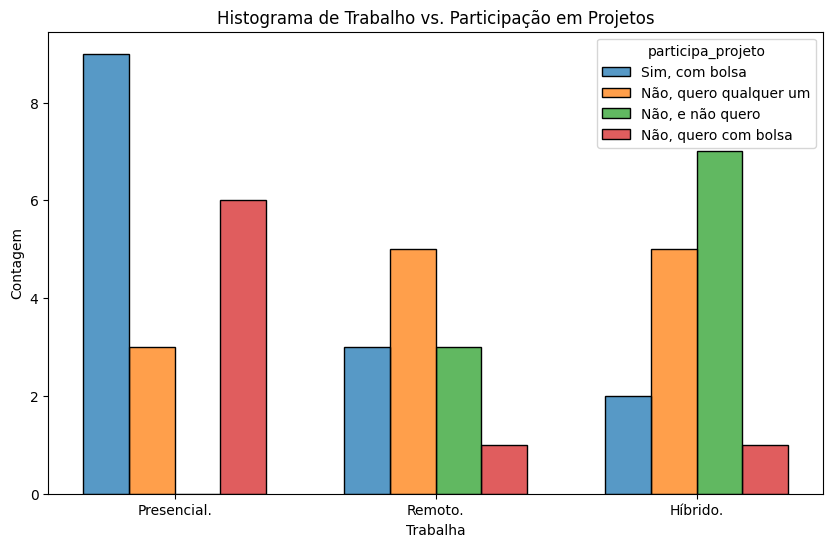

In [55]:
trabalha_sim = df[~df['trabalha'].str.contains('Não')]

plt.figure(figsize=(10,6))
sns.histplot(data=trabalha_sim, x='modalidade_trabalho', hue='participa_projeto',multiple="dodge", shrink=0.7)
plt.xlabel('Trabalha')
plt.ylabel('Contagem')
plt.title('Histograma de Trabalho vs. Participação em Projetos')
plt.show()